# Information
This notebook is for plotting the precision recall. The input is a tab separated value file with 4 columns. The first column shows the threshold on the desired value (such as bitscore, bitscore/alnlen, or probability). The second column shows the total number of hits with such a value. The third and fourth column show the number of TPs and FPs with such a value.

In [1]:
import sys
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob

In [2]:
def CalcPrecisionRecallVec(TPFPpath):
    df = pd.read_csv(TPFPpath, sep="\t")
    df = df.set_index(["0"])
    df = df.sort_index(ascending=False)
    df["CumCount"] = df["total"].cumsum(axis=0)
    df["CumPos"] = df["NoOf1"].cumsum(axis=0)
    df["Precision"] = df["CumPos"]/df["CumCount"]
    df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
    df = df.sort_index()
    return df["Precision"], df["Recall"], pd.Series(df.index)

def CalcFmax(precision,recall, Threshs):
    precision_rev, recall_rev,Threshs_rev = np.flip(precision).reset_index(drop=True),np.flip(recall).reset_index(drop=True), np.flip(Threshs).reset_index(drop=True)
    F = (2*precision_rev*recall_rev)/(precision_rev + recall_rev)
    Fmax = F.max()
    maximumarg = np.argmax(F)
    ThreshMax = Threshs_rev[maximumarg]
    return Fmax, ThreshMax, F, Threshs_rev

In [3]:
all_pf = [x for x in list(sorted(glob.glob("../PrecisionRecallData/all_pf/*.tsv"))) if not "prob" in x]
all_pf_10 = [x for x in list(sorted(glob.glob("../PrecisionRecallData/all_pf_e10/*.tsv"))) if not "prob" in x]

In [4]:
def map_path_fname(path):
    filename =  os.path.basename(path).replace(".tsv", "")
    filename2name = {"PfamSDB_cutFS___bits": "FS_cut, bits",
                     "PfamSDB_cutPDB___bits": "PDB_cut, bits",
                     "PfamSDB_cutFS___bits_alnlen": "FS_cut, bits/alnlen",
                     "PfamSDB_cutPDB___bits_alnlen": "PDB_cut, bits/alnlen"
                    }
    return filename2name[filename]

FilePathsAndNames = {x:map_path_fname(x) for x in all_pf}

In [5]:
%config InlineBackend.figure_format = 'retina'

The following cell is for the results with e-value up to 10**-3

../PrecisionRecallData/all_pf\PfamSDB_cutFS___bits.tsv
152
../PrecisionRecallData/all_pf\PfamSDB_cutFS___bits_alnlen.tsv
0.88
../PrecisionRecallData/all_pf\PfamSDB_cutPDB___bits.tsv
152
../PrecisionRecallData/all_pf\PfamSDB_cutPDB___bits_alnlen.tsv
0.84


C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Re

<Figure size 10240x7680 with 0 Axes>

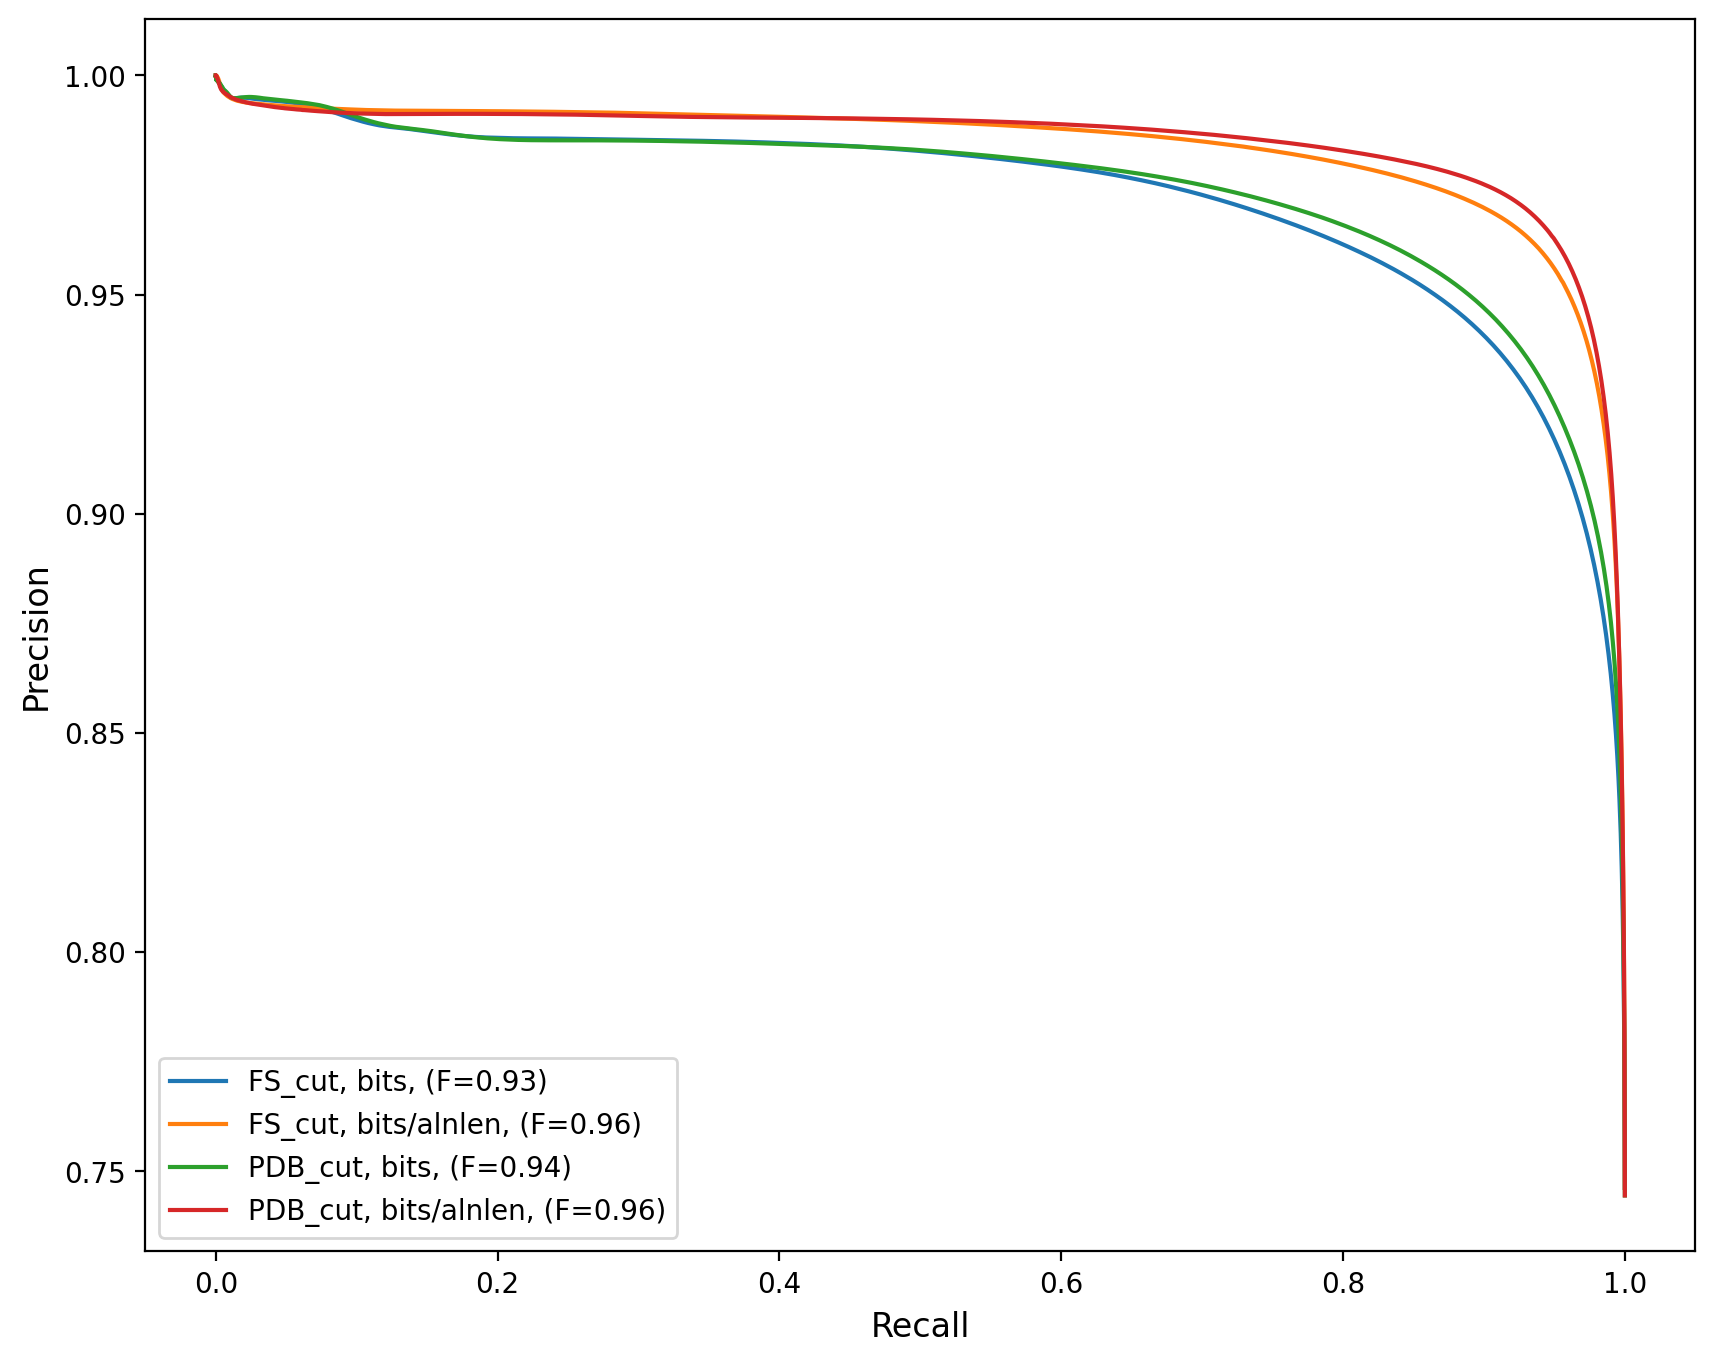

In [6]:
plt.figure(dpi=1600)
plt.figure(figsize=(10, 8))
resDict_3 = {}
for filepath in FilePathsAndNames:
    precision,recall,thresh = CalcPrecisionRecallVec(filepath)
    fmax,threshOfFmax,F, Threshs = CalcFmax(precision,recall,thresh)
    print(filepath)
    print(threshOfFmax)
    resDict_3[filepath] = (precision, recall,F, Threshs )
    plt.plot(recall,precision, label = f"{FilePathsAndNames[filepath]}, (F={round(fmax,2)})")

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend()


The following cell is for the results with e-value up to 10

In [7]:
FilePathsAndNames = {x:map_path_fname(x) for x in all_pf_10}

../PrecisionRecallData/all_pf_e10\PfamSDB_cutFS___bits.tsv
50
../PrecisionRecallData/all_pf_e10\PfamSDB_cutFS___bits_alnlen.tsv
0.54
../PrecisionRecallData/all_pf_e10\PfamSDB_cutPDB___bits.tsv
51
../PrecisionRecallData/all_pf_e10\PfamSDB_cutPDB___bits_alnlen.tsv
0.55


C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Re

<Figure size 10240x7680 with 0 Axes>

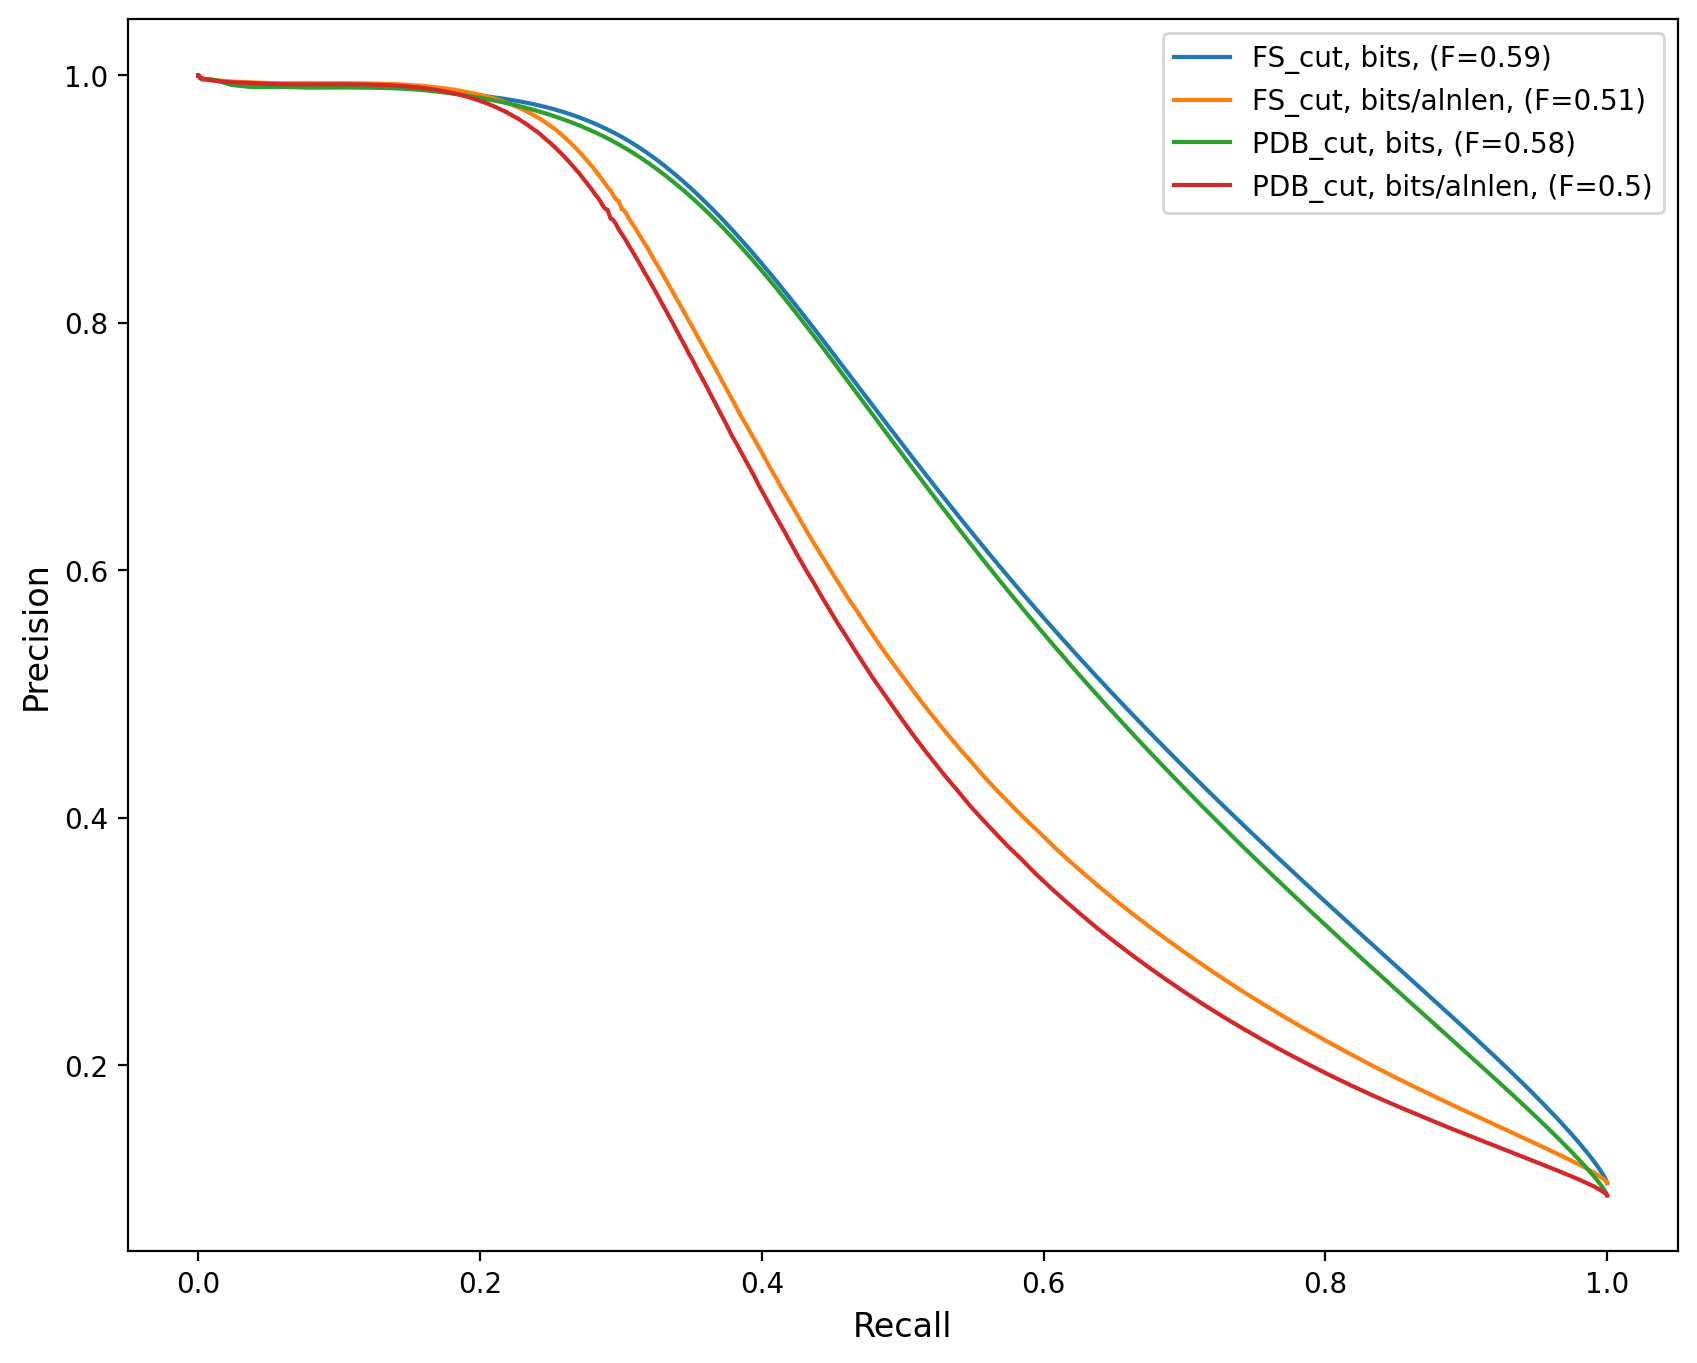

In [8]:
plt.figure(dpi=1600)
plt.figure(figsize=(10, 8))
resDict = {}
for filepath in FilePathsAndNames:
    
    precision,recall,thresh = CalcPrecisionRecallVec(filepath)
    fmax,threshOfFmax,F, Threshs = CalcFmax(precision,recall,thresh)
    resDict[filepath] = (precision, recall,F, Threshs )
    print(filepath)
    print(threshOfFmax)
    plt.plot(recall,precision, label = f"{FilePathsAndNames[filepath]}, (F={round(fmax,2)})")

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend()


In [9]:
FilePathsAndNames2 = {"../PrecisionRecallData/all_pf/PfamSDB_cutPDB___prob.tsv": "PDB_cut, prob",
                     "../PrecisionRecallData/all_pf/PfamSDB_cutFS___prob.tsv": "FS_cut, prob"
                    }

C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))
C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))


<Figure size 10240x7680 with 0 Axes>

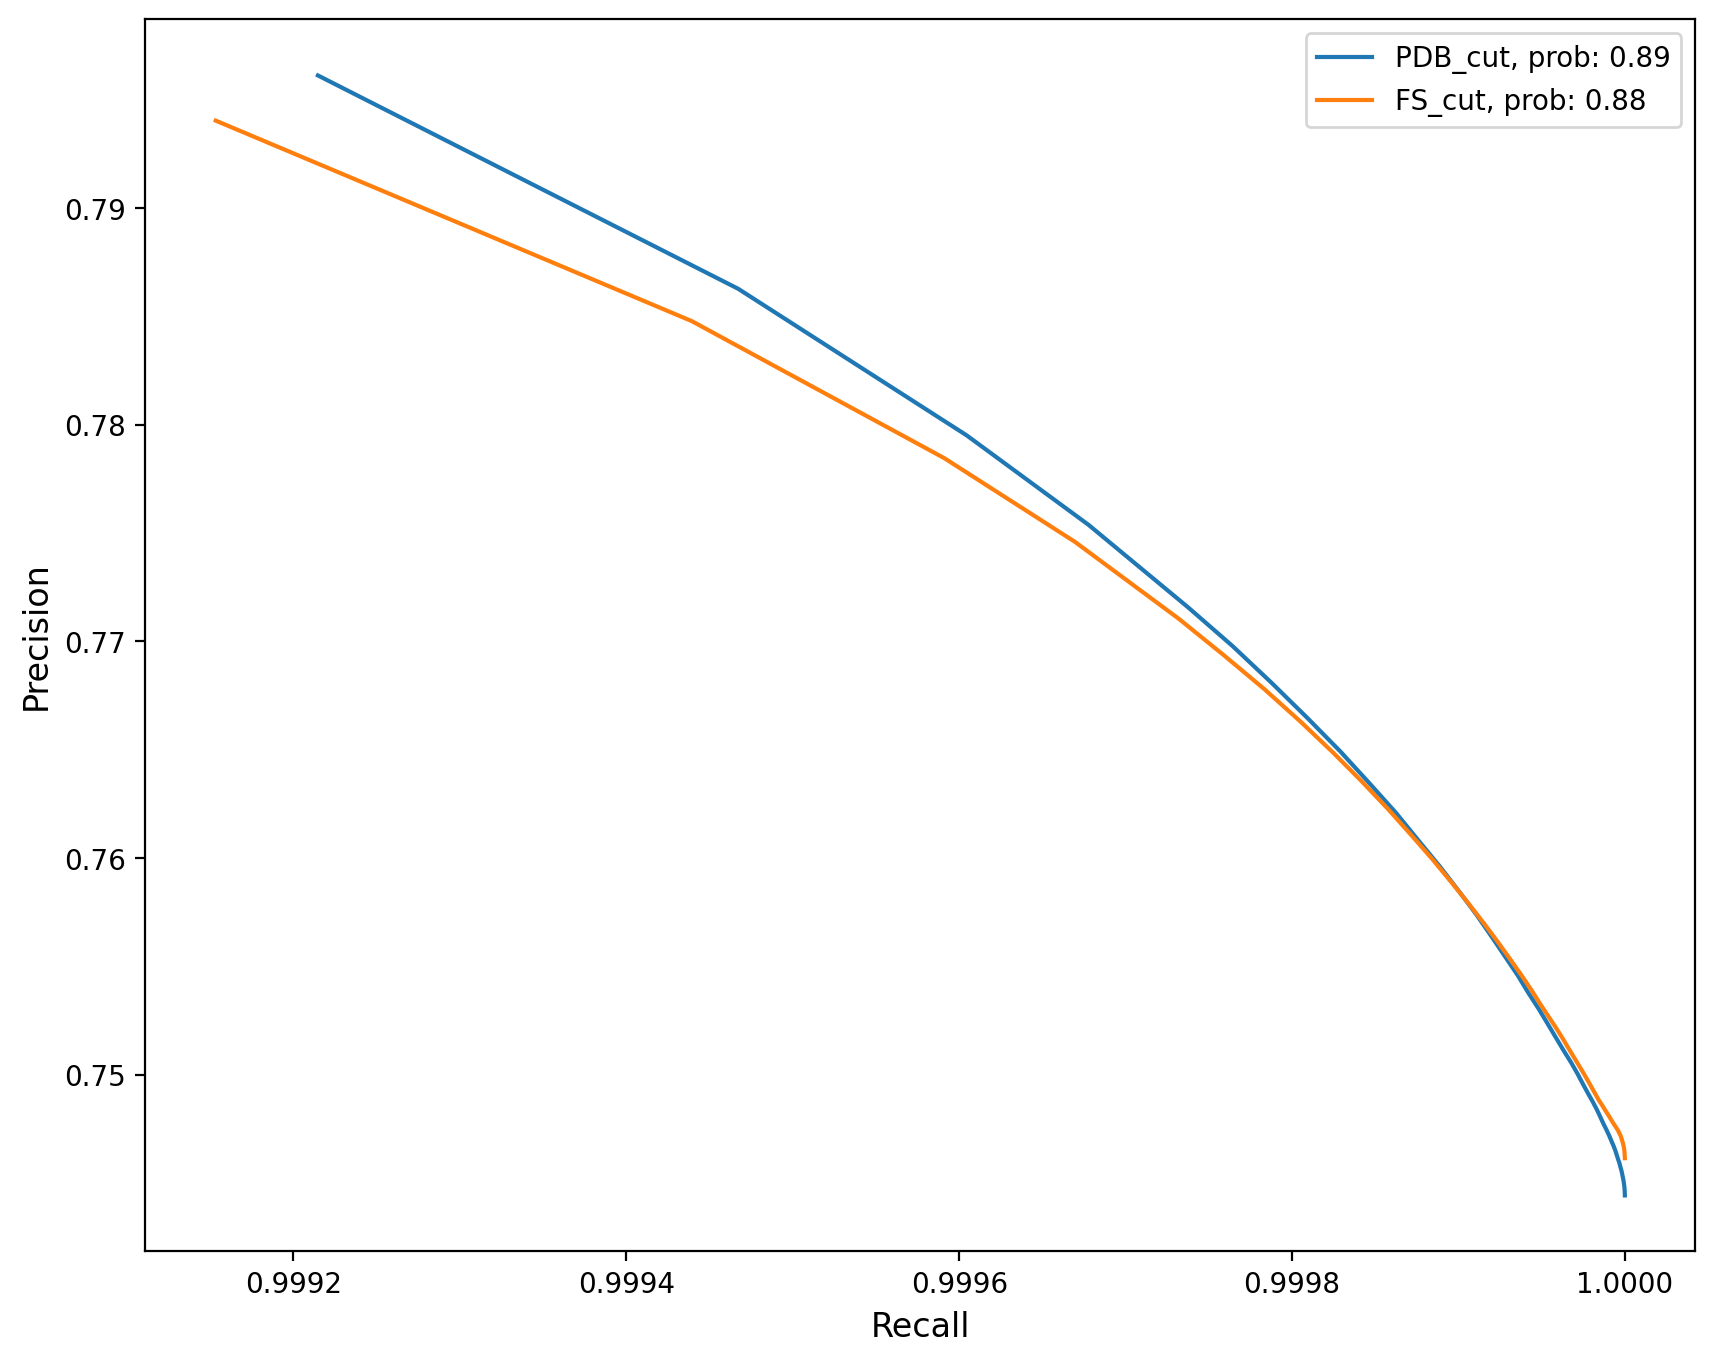

In [10]:
plt.figure(dpi=1600)
plt.figure(figsize=(10, 8))

for filepath in FilePathsAndNames2:
    precision,recall,thresh = CalcPrecisionRecallVec(filepath)
    fmax,threshOfFmax,F, Threshs = CalcFmax(precision,recall,thresh)  
    plt.plot(recall,precision, label = f"{FilePathsAndNames2[filepath]}: {round(fmax,2)}")

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend()


# MMseqs2
Benchmarking sequence based bit score

In [11]:
file = "../PrecisionRecallData/mm/aln_pf_seq_TPFP_bits.tsv"

In [12]:
%config InlineBackend.figure_format = 'retina'

C:\Users\poory\AppData\Local\Temp\ipykernel_18228\1407285343.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Recall"] = df["CumPos"]/int(df["CumPos"].tail(1))


Text(0, 0.5, 'Precision')

<Figure size 10240x7680 with 0 Axes>

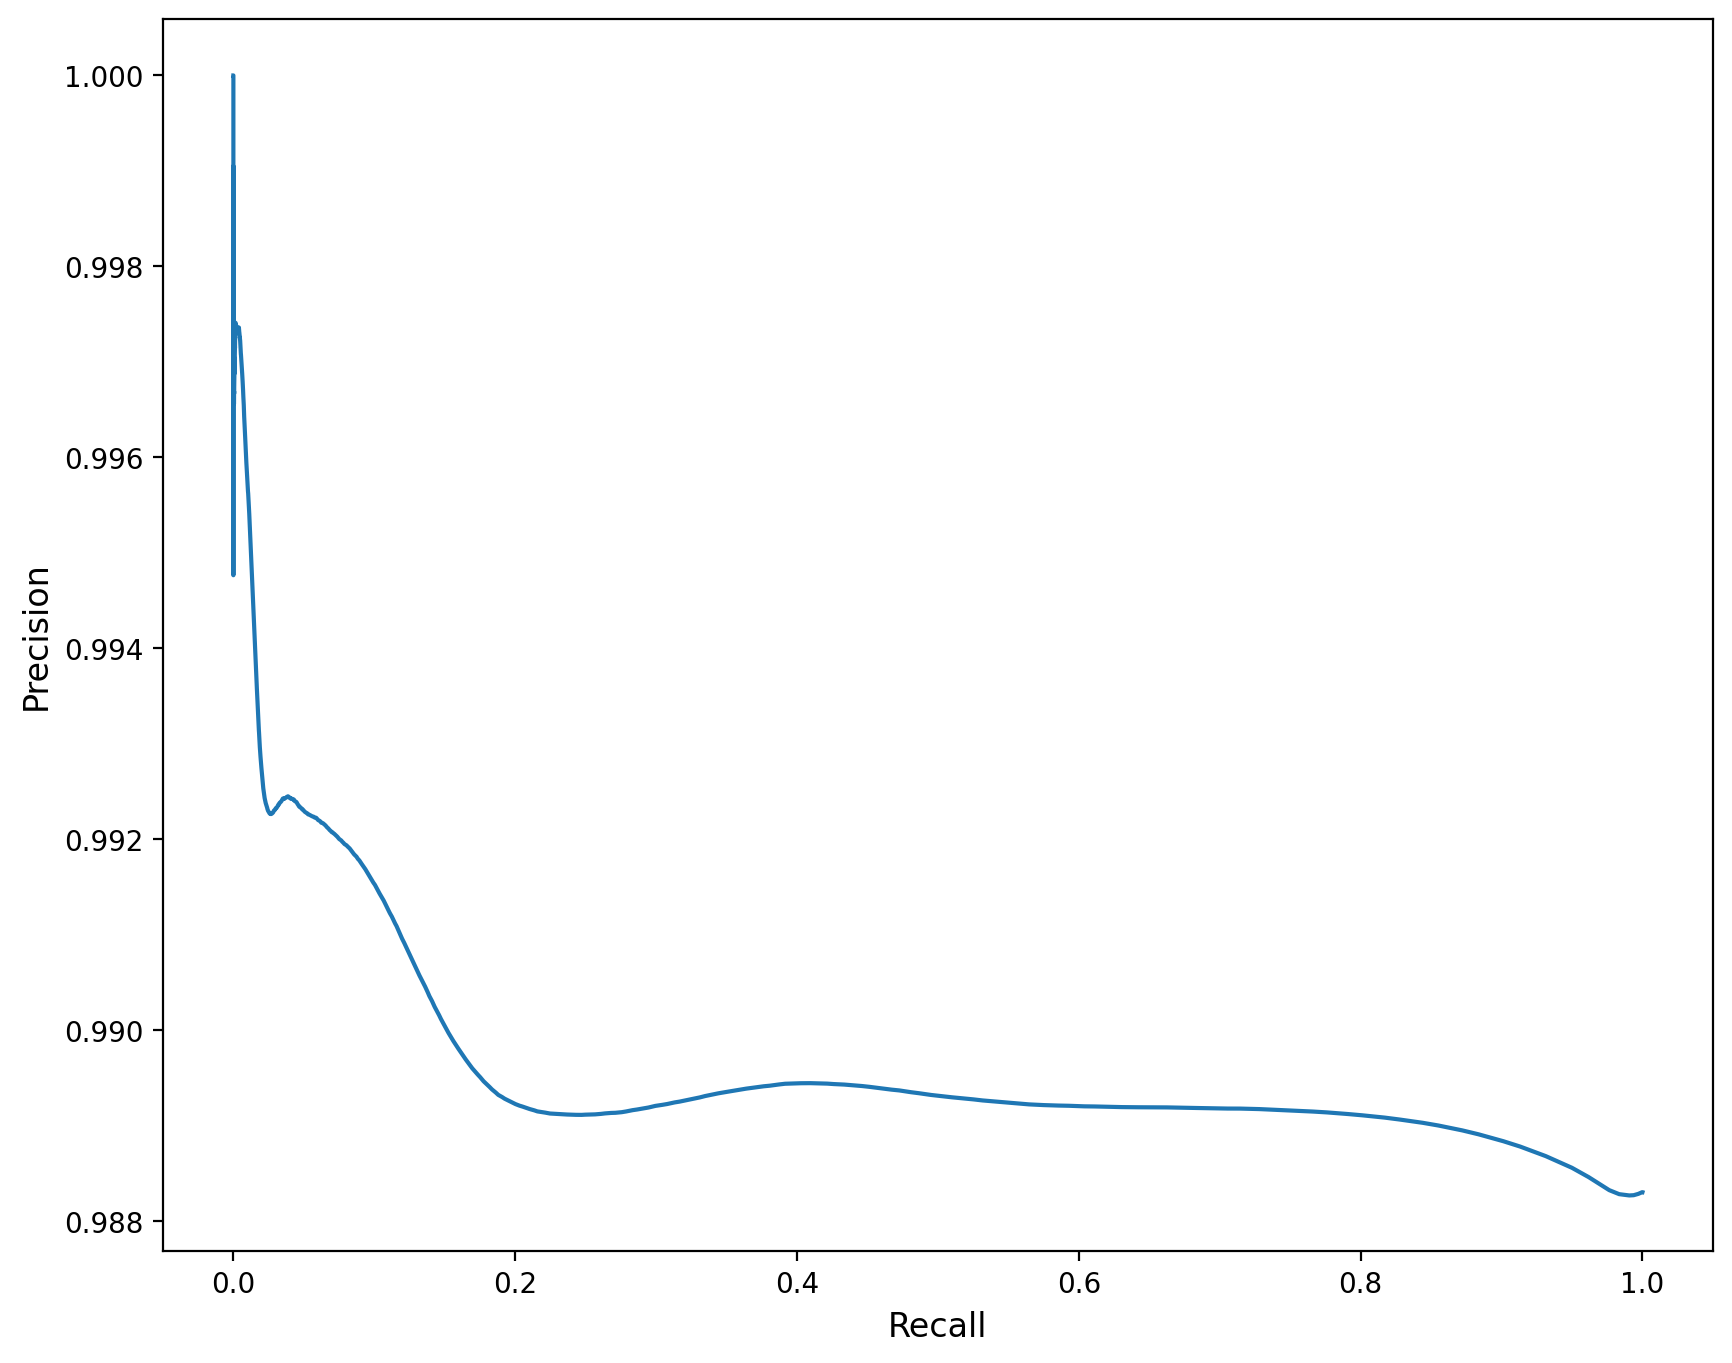

In [13]:
plt.figure(dpi=1600)
plt.figure(figsize=(10, 8))

precision,recall,thresh = CalcPrecisionRecallVec(file)
fmax,threshOfFmax,F, Threshs = CalcFmax(precision,recall,thresh)  
    
plt.plot(recall,precision)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)


In [14]:
print(fmax)
print(threshOfFmax)

0.994116484376613
36
